# Importing all the required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LinearRegression

# Importing Data set

In [12]:
df=pd.read_csv('Salary_Data.csv')


# Data Analysis

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,...,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5
Salary,39343.0,46205.0,37731.0,43525.0,39891.0,56642.0,60150.0,54445.0,64445.0,57189.0,...,91738.0,98273.0,101302.0,113812.0,109431.0,105582.0,116969.0,112635.0,122391.0,121872.0


#### delivery_time.csv file contain 2 Rows['YearsExperience', 'Salary'] and 30 columns .

In [14]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:>

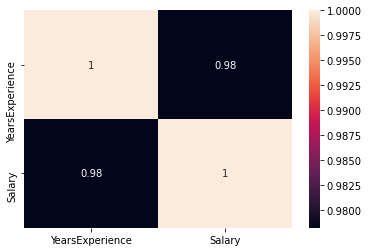

In [15]:
sns.heatmap(df.corr(),annot=True)

#### this is the Correlation between 'YearsExperience' and 'Salary' columns data and as we can see that the relation between them is higher then 90% so we can use  'YearsExperience' to predict 'Salary'. 

Text(0, 0.5, 'Salary')

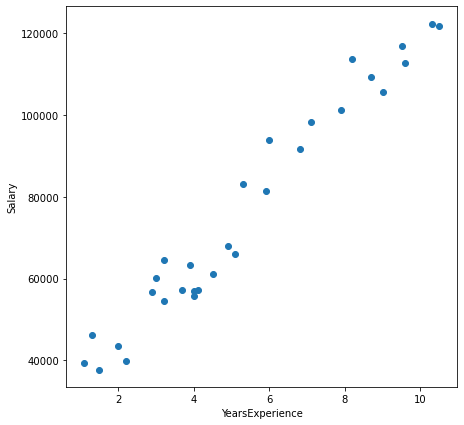

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

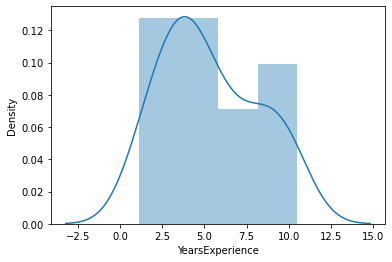

In [17]:
sns.distplot(df['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

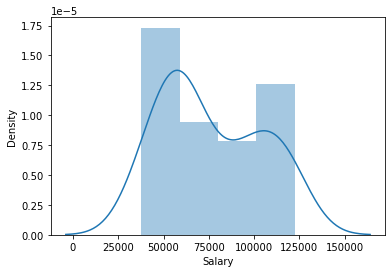

In [18]:
sns.distplot(df['Salary'])

# Creating the regression model 

In [19]:
model = smf.ols("Salary ~ YearsExperience",data = df).fit()

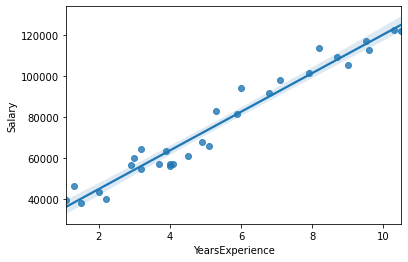

In [20]:
sns.regplot( x="YearsExperience", y="Salary" , data=df);

In [21]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#### As we can see R2 and Adj.R2 are close to each other that . R^2 value is close to 1 that means data fitted to model properly.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        21:38:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
ypred=model.predict(df['YearsExperience'])

In [27]:
rmse = np.sqrt(np.mean((df['YearsExperience']-ypred)**2))
rmse

80440.84508275457

In [29]:
MSE= metrics.mean_squared_error(df['YearsExperience'],ypred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 80440.84508275457


Text(0, 0.5, 'Salary')

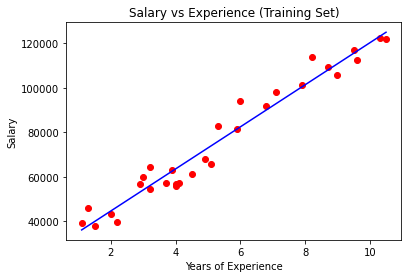

In [36]:
plt.scatter(df['YearsExperience'],df['Salary'], color = 'red')
plt.plot(df['YearsExperience'], ypred, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Using the Sklearn Linear regression

In [54]:
x=df.iloc[:,:1]
y=df.iloc[:,1:2]

In [58]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [59]:
ypred1=lr.predict(x)

In [60]:
MSE= metrics.mean_squared_error(y,ypred1)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 5592.043608760662


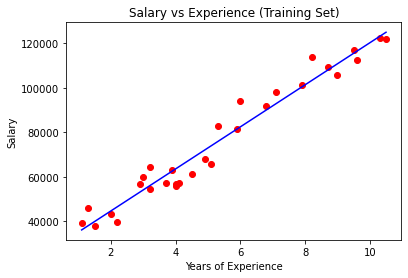

In [61]:
plt.scatter(x, y, color = 'red')
plt.plot(x, ypred1, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Log Transformation

In [37]:
log_model = smf.ols("Salary~np.log(YearsExperience)", data = df).fit()

In [38]:
log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           3.25e-13
Time:                        21:48:11   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
log_pred = log_model.predict(df['YearsExperience'])

Text(0, 0.5, 'Salary')

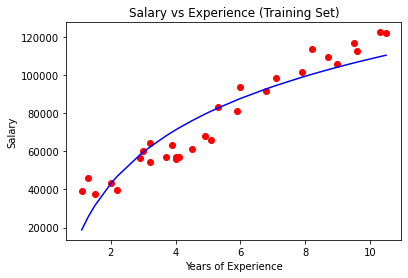

In [42]:
plt.scatter(df['YearsExperience'],df['Salary'], color = 'red')
plt.plot(df['YearsExperience'],log_pred, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [43]:
MSE= metrics.mean_squared_error(df['YearsExperience'],log_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 79974.15496099806


# Exponential Transformation

In [45]:
exp_model = smf.ols("np.log(Salary)~YearsExperience", data = df).fit()

In [46]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           7.03e-18
Time:                        21:52:19   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
exp_pred = exp_model.predict(df['YearsExperience'])
exp_pred.head()

0    10.645400
1    10.670491
2    10.695581
3    10.758308
4    10.783398
dtype: float64

In [51]:
exp_pred = np.exp(exp_pred)

Text(0, 0.5, 'Salary')

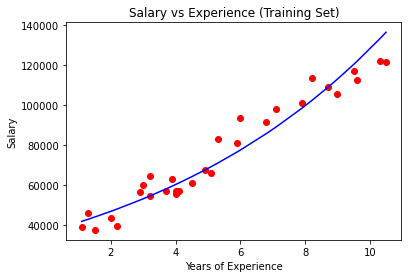

In [52]:
plt.scatter(df['YearsExperience'],df['Salary'], color = 'red')
plt.plot(df['YearsExperience'],exp_pred, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [53]:
MSE= metrics.mean_squared_error(df['YearsExperience'],exp_pred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 80857.92236328156
